# Images Clasification

The goal of your project is to create a robust classifier, to collect data and prepare custom dataset.  
You will build a model that will recognize

* Properties
* Indoor
  * Kitchen 
   <img src = "https://ksassets.timeincuk.net/wp/uploads/sites/56/2020/01/Navy-blue-kitchen-Ideal-Home.jpg" width = "25%" height="25%">
  * Living room 
       <img src = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/ba-0111778-lr-1592404733.jpg" width = "25%" height="25%">
 
  * Bathroom
     <img src= "https://cdn.shopify.com/s/files/1/0274/5001/articles/Bathroom-Essentials_880x440_crop_center.png?v=1601671417" width="25%" height="25%"/>
    * Bedroom
     <img src = "https://www.sani-resort.com/uploads/assets/667x444/porto-sani-_-two-bedroom-family-suite_2_667x444-1.jpg" width="25%" height="25%">
     
* Outdoor 
     <img src="https://cdn.trendir.com/wp-content/uploads/old/house-design/indoor-outdoor-house-design-with-alfresco-terrace-living-area-1.jpg" width="25%" height="25%"/>
     
* Garbage
    *  Map
    <img src = "https://d3i71xaburhd42.cloudfront.net/5b3861cd064f66f1349d379fda36ae295665dc2f/5-TableIV-1.png" width="25%" height="25%">
    * Other things, Garbage (Logo, tables, signatures ...) 

This project consists of the following activities :


## Dataset info

https://drive.google.com/drive/folders/1HOn2LPxoKKTG3whaxkTQrEyltw6uz82n?usp=sharing

* Raw Data : Useful for garbage and maybe outdoor images
* Room data : Useful for Indoor images

## Plan
1. Phase 1 : Dataset and team planning
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Collection
    * Dataset Preparation
2. Phase 2 : Training
    * Research about neural networks
    * Compose and train neural network architectures
    * Ping Pong phase with Dataset labelers
    * Generate syntethic data if needed
    * Fine tunning of your model
3. Phase 3 : Deployment
    * Analysis and benchmark Precision/Recall + Confusion Matrix
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
!unrar x "/gdrive/MyDrive/Proekt_Brainster/Images.rar" "/content/Data2/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/Data2/bathroom/00000002.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000003.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000004.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000005.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000006.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000007.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000008.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000009.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000010.jpg                          97%  OK 
Extracting  /content/Data2/bathroom/00000011.jpg                          97%  OK 
Extracting  /content/Data2/ba

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras:
import tensorflow as tf
from tensorflow import keras

# Helper libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initializing other libraries:

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16
from keras import models, layers

In [ ]:
import glob
lista_na_sliki = glob.glob("/content/Data2/*/*.jpg")
lista_na_sliki[0:3]

['/content/Data2/bathroom/00003677.jpg',
 '/content/Data2/bathroom/00002987.jpg',
 '/content/Data2/bathroom/00002540.jpg']

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
from keras.datasets import mnist #  ni ovozmozuva vcituvanje na podatocno mnozestvo
from keras.models import Sequential 
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/Data2/'

In [ ]:
batch_size=32

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

generator = ImageDataGenerator(
                   validation_split=0.2,
                   preprocessing_function = preprocess_input
                   )

train_generator = generator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode ='categorical',
    subset='training'
)

validation_generator = generator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode ='categorical',
    subset='validation',
    shuffle=False
)


Found 27337 images belonging to 7 classes.
Found 6832 images belonging to 7 classes.


# Define Model Architecture

MODEL2

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
# load model without classifier layers
model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights
="imagenet")
# add new classifier layers
flat1 = Flatten()(model.output)
class1 = Dense(1000, activation='relu')(flat1)
output = Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
for layer in model.layers[:-13]:
  layer.trainable = False

94781440/94765736 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Define Loss Function, Optimizator

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define Augmentator

In [ ]:
from keras.callbacks import ReduceLROnPlateau
checkpoint = ModelCheckpoint('drive/MyDrive/rooms.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
nb_epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    callbacks = [checkpoint],
    epochs = nb_epochs)

Epoch 1/10
854/854 [==============================] - 333s 350ms/step - loss: 1.1102 - accuracy: 0.9037 - val_loss: 0.2168 - val_accuracy: 0.9250

Epoch 00001: val_accuracy improved from -inf to 0.92503, saving model to drive/MyDrive/rooms.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
854/854 [==============================] - 298s 349ms/step - loss: 0.0786 - accuracy: 0.9740 - val_loss: 0.2502 - val_accuracy: 0.9303

Epoch 00002: val_accuracy improved from 0.92503 to 0.93031, saving model to drive/MyDrive/rooms.h5
Epoch 3/10
854/854 [==============================] - 298s 348ms/step - loss: 0.0642 - accuracy: 0.9836 - val_loss: 0.3312 - val_accuracy: 0.9230

Epoch 00003: val_accuracy did not improve from 0.93031
Epoch 4/10
854/854 [==============================] - 298s 349ms/step - loss: 0.0834 - accuracy: 0.9799 - val_loss: 0.4043 - val_accuracy: 0.9218

Epoch 00004: val_accuracy did not improve from 0.93031
Epoch 5/10
854/854 [==============================] - 298s 349ms/step - loss: 0.0613 - accuracy: 0.9851 - val_loss: 0.6084 - val_accuracy: 0.9127

Epoch 00005: val_accuracy did not improve from 0.93031
Epoch 6/10
854/854 [==============================] - 298s 348ms/step - loss: 0.1267 - accuracy: 0.9799 - val_loss: 0.5802 - val_accuracy: 0.9196

E

In [ ]:
from keras.models import load_model
transfer_model = load_model('/content/drive/MyDrive/rooms.h5')

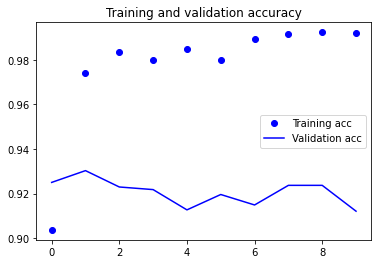

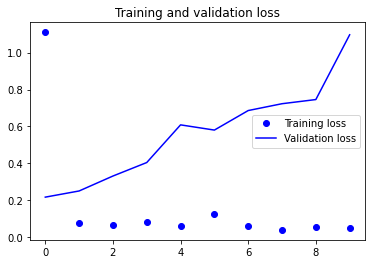

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Evaluate the model

#model.evaluate(validation_generator)

In [ ]:
lista_na_sliki[0].split("/")[3]

'bathroom'

In [ ]:
transfer_model.evaluate(validation_generator)

214/214 [==============================] - 54s 254ms/step - loss: 0.2502 - accuracy: 0.9302


[0.2501867413520813, 0.9301815032958984]

In [ ]:
validation_generator.classes
np.unique(validation_generator.classes)
test_labels=validation_generator.classes
test_labels


array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
prediction = transfer_model.predict_generator(validation_generator)
#prediction = model.predict(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
prediction[0]
preds = np.argmax(prediction,axis=1)
preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
classes = ['bathroom','bedroom', 'dining_room', 'kitchen', 'maps', 'other', 'outdoor']

# Example:


Provide several examples of predictions along with softmax score probability

In [ ]:
import urllib.request
import cv2

def get_prediction(image):
    image = np.expand_dims(image, axis=0)
    
    # istreniraniot model go koristime za prepoznavanje
    prediction = model.predict(image)
    # prepoznaenata klasa ni e indeksot od najgolemata vrednost vo izlezot (prediction), najgolemata verojatnost
    predicted_class = np.argmax(prediction)
    return classes[predicted_class]

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_for_nn = cv2.resize(image, (224,224))
  image_for_nn = preprocess_input(image_for_nn)
  #image_resized = image_resized.astype(np.float32)/255.0
  return image_for_nn, image

def predict_url(url):
  image_resized, image = url_to_image(url)
  predicted_class = get_prediction(image_resized)
  plt.imshow(image)
  plt.title("Предвидено : " + predicted_class)

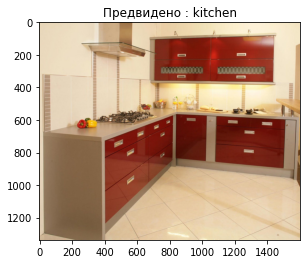

In [ ]:
predict_url('https://i.pinimg.com/originals/c6/67/86/c6678672a6f15ee5a47be4c43a060c54.jpg')

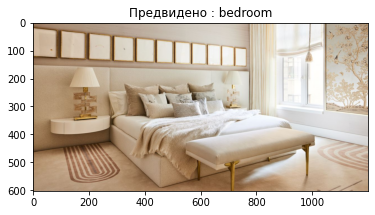

In [ ]:
predict_url('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/master-bedroom-kelly-behun-rug-kelly-behun-pendant-gracie-studio-panels-1623442703.jpg?crop=1.00xw:0.753xh;0,0.240xh&resize=1200:*')

# Benchmark

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds, target_names = classes))

              precision    recall  f1-score   support

    bathroom       0.91      0.93      0.92      1000
     bedroom       0.95      0.91      0.93      1000
 dining_room       0.82      0.89      0.86      1000
     kitchen       0.87      0.84      0.86      1000
        maps       0.99      0.99      0.99       872
       other       0.99      0.98      0.99       998
     outdoor       1.00      0.99      0.99       962

    accuracy                           0.93      6832
   macro avg       0.93      0.93      0.93      6832
weighted avg       0.93      0.93      0.93      6832



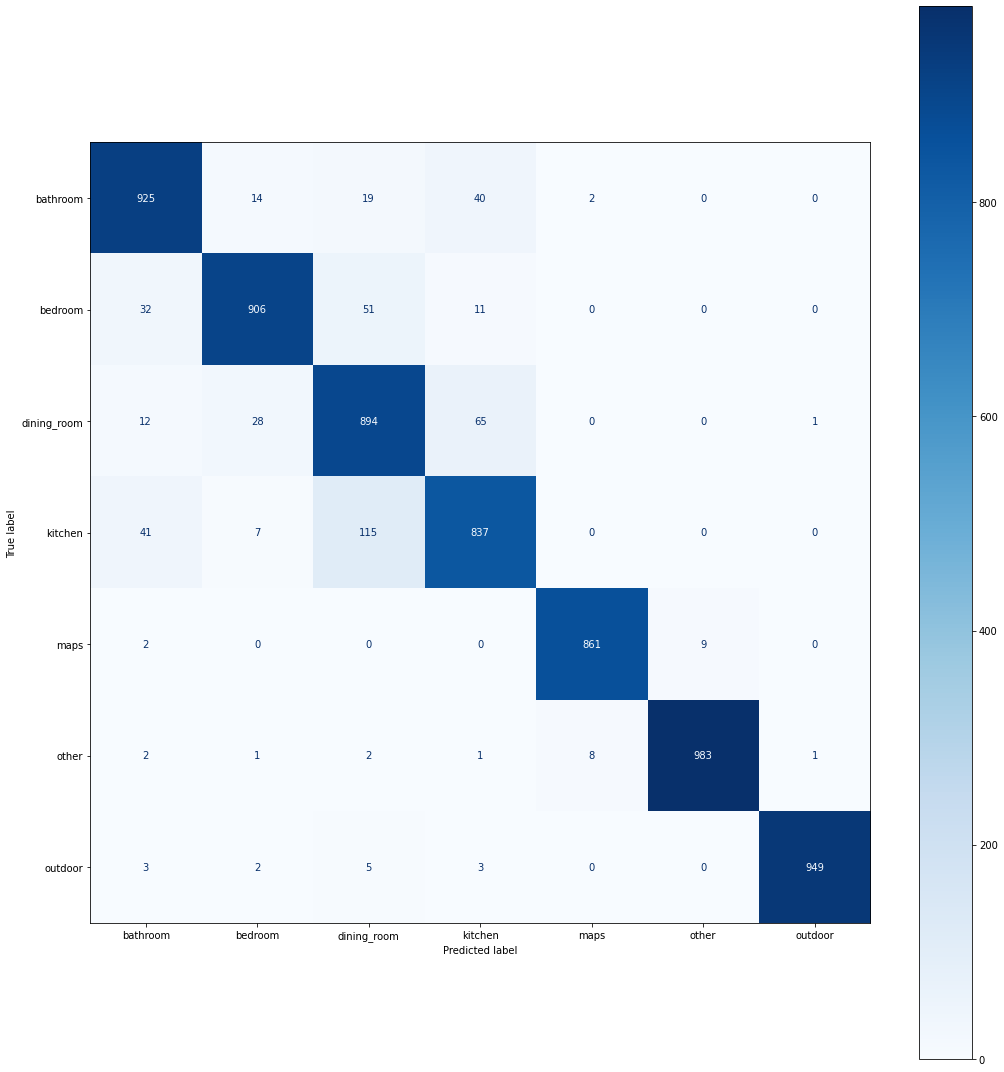

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
figure,ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(test_labels, preds)
displ = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
displ.plot(cmap=plt.cm.Blues, ax=ax, values_format='.0f')
plt.tight_layout()
plt.show()

In [ ]:
print('Precision_score', precision_score(test_labels, preds, average='micro'))
print('recall_score', recall_score(test_labels, preds,  average='micro'))
print('f1_score_micro', f1_score(test_labels, preds, average='micro'))
print('f1_score_weighted', f1_score(test_labels, preds, average='weighted'))

Precision_score 0.9301814988290398
recall_score 0.9301814988290398
f1_score_micro 0.9301814988290398
f1_score_weighted 0.9304868728081062


In [ ]:
from google.colab import files

with open('/content/drive/MyDrive/rooms.h5', 'w') as f:
  f.write('some content')

files.download('/content/drive/MyDrive/rooms.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary about your results